# Image Pixelization with Differential Privacy

In [1]:
import random
import numpy as np
import sys

In [2]:
sys.path.insert(0, '..')

from src import util as iu
from src import dp_pixel as dp
from src import dataset as db
from src.resize import Resize
from src.pixelate import Pixelate

In [3]:
resize_f = Resize.pad_image
pixelate_f = Pixelate.pytorch

In [4]:
def load(dataset, n=16):
    images = dataset.load_images(n)
    iu.display_image_grid(images)
    return images

In [5]:
def dp_pixelate_images(images, target_h, target_w, m, eps):
    noisy_images = [dp.dp_pixelate(I,target_h, target_w, m, eps, resize_f=resize_f, 
                                   pixelate_f=pixelate_f) for I in images]
    iu.display_image_grid(noisy_images)

In [6]:
def vary_eps(images, target_h, target_w, m, start, end, step):
    I = random.choice(images)
    eps_vals = np.arange(start,end+step,step)
    noisy_images = [dp.dp_pixelate(I, target_h, target_w, m, eps, resize_f=resize_f,
                                  pixelate_f=pixelate_f) for eps in eps_vals]
    titles=["{:.1f}".format(eps) for eps in eps_vals]
    iu.display_image_grid(noisy_images, titles=titles)

# AT&T Faces Dataset

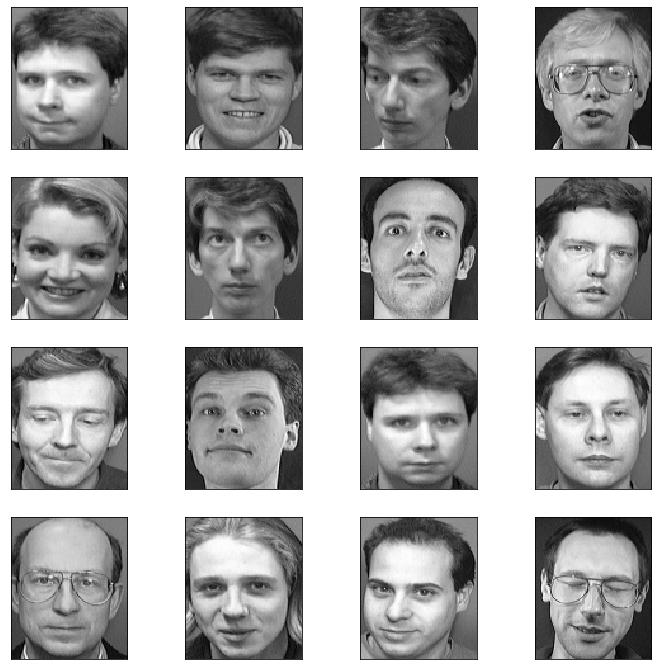

In [7]:
faces = load(db.FacesDataset())

## Set the parameters

In [8]:
target_h = 28 # f_h = 4
target_w = 23 # f_w = 4
m = 10
eps = 10

## DP Pixelated Images

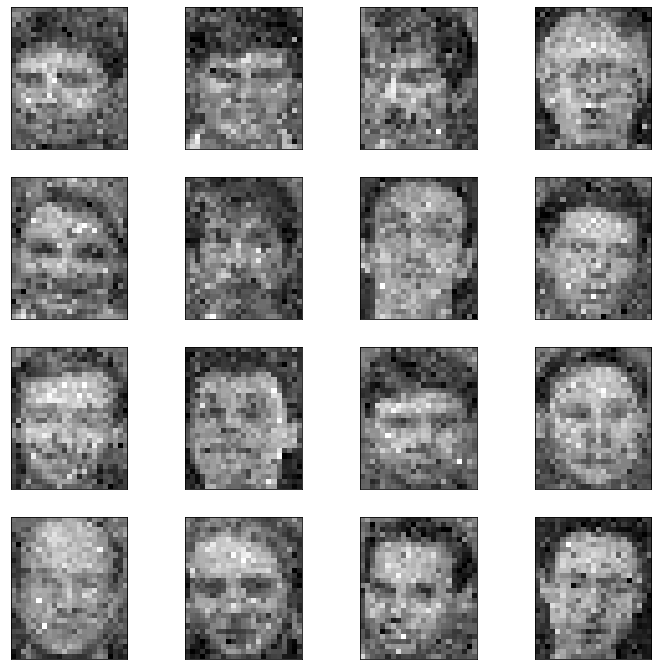

In [9]:
dp_pixelate_images(faces, target_h,target_w, m, eps)

## Decreasing $eps$ 10 $\rightarrow$ 1 by 1

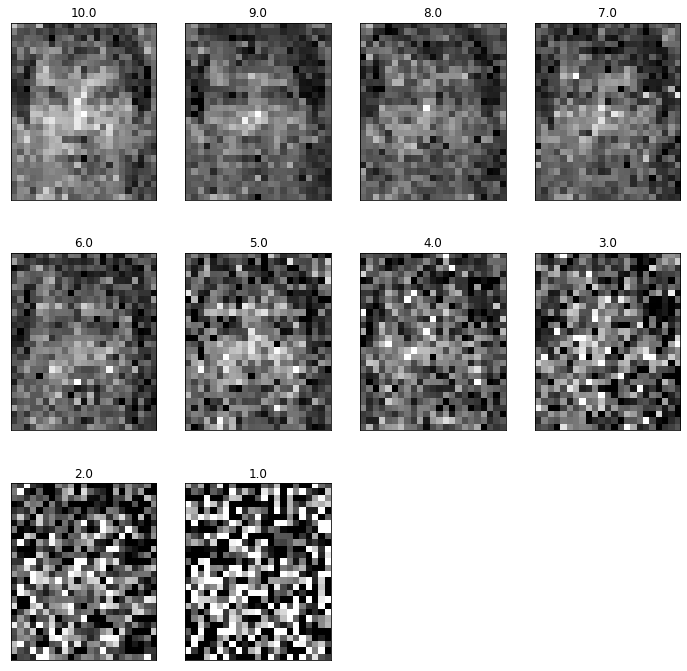

In [10]:
vary_eps(faces, target_h,target_w, m, 10, 1, -1)

# ImageNet Dataset

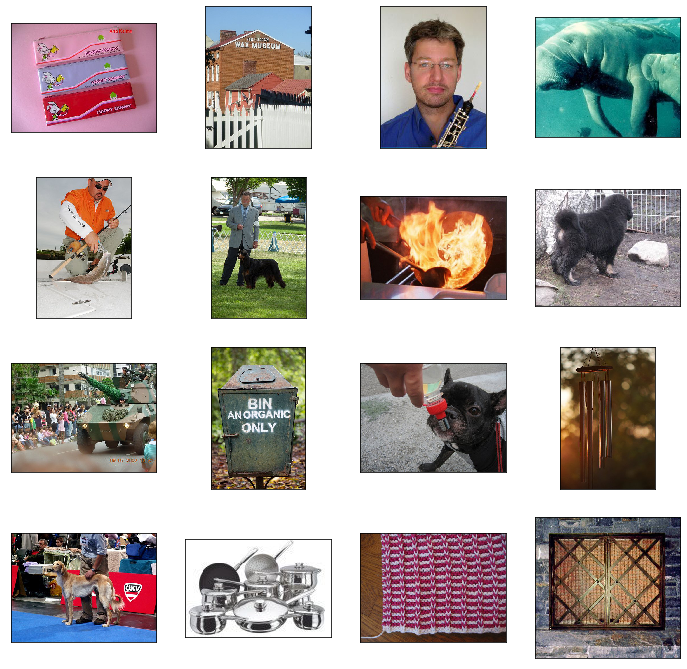

In [11]:
objects = load(db.MiniImageNetDataset())

## Set the parameters

In [12]:
target_w = 84
target_h = 84
m = 10
eps = 10

## DP Pixelated Images

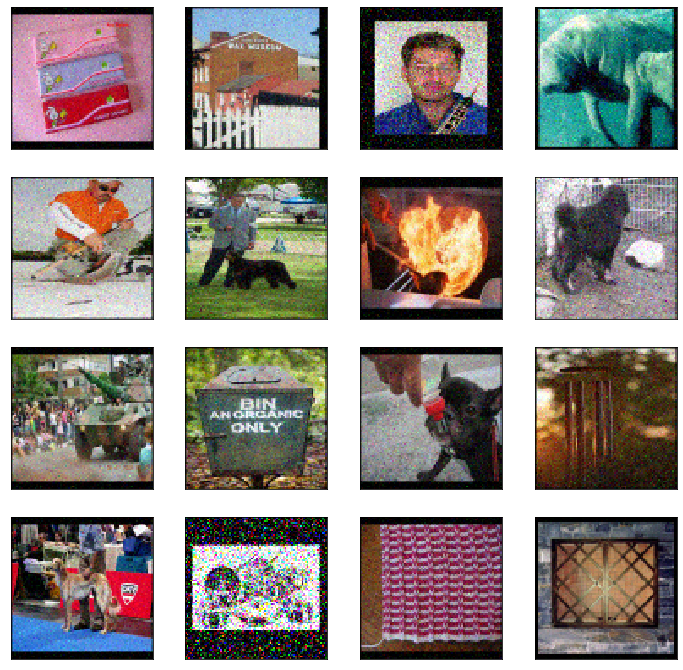

In [13]:
dp_pixelate_images(objects, target_h,target_w, m, eps)

## Decreasing $eps$ 10 $\rightarrow$ 1 by 1

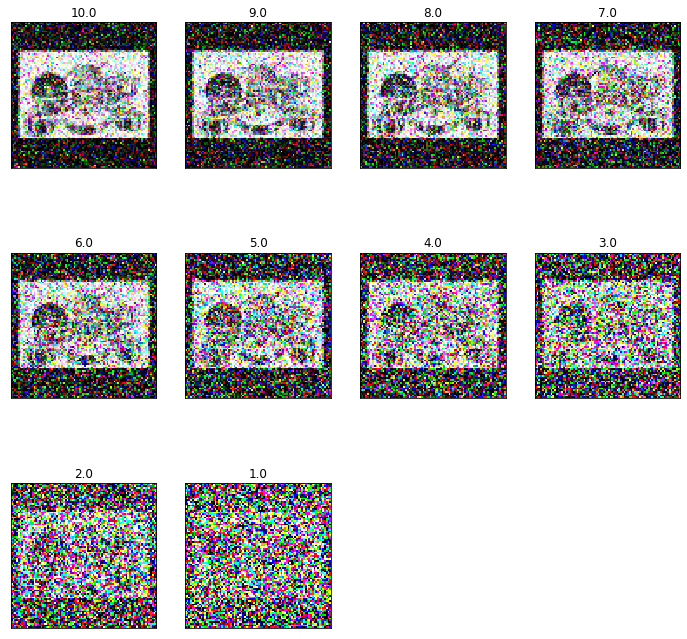

In [14]:
vary_eps(objects, target_h,target_w, m, 10, 1, -1)

# Omniglot Dataset

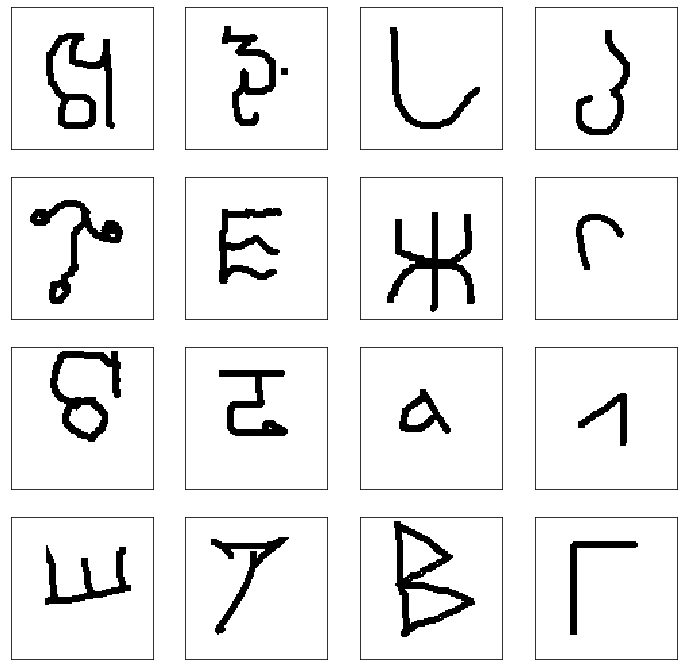

In [15]:
characters = load(db.OmniglotDataset())

## Set the parameters



In [16]:
target_w = 28
target_h = 28
m = 10
eps = 10

## DP Pixelate Images

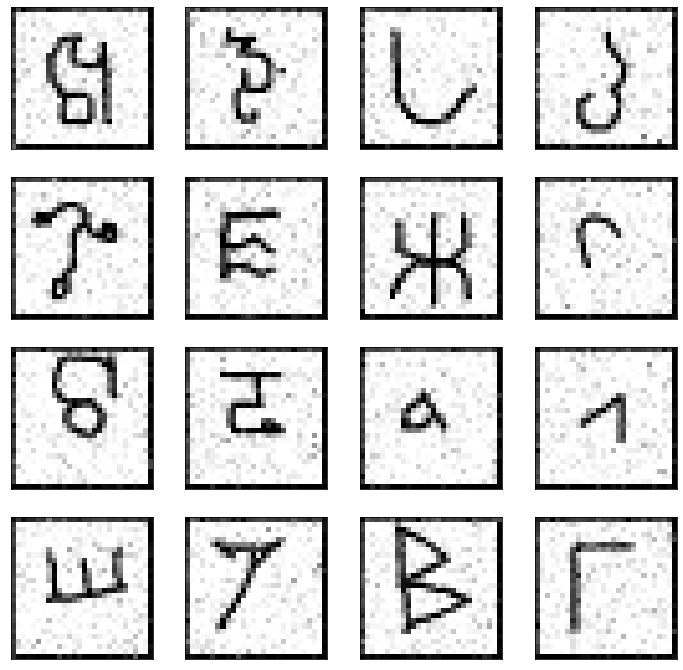

In [17]:
dp_pixelate_images(characters, target_h,target_w, m, eps)

## Decreasing $eps$ 10 $\rightarrow$ 1 by 1

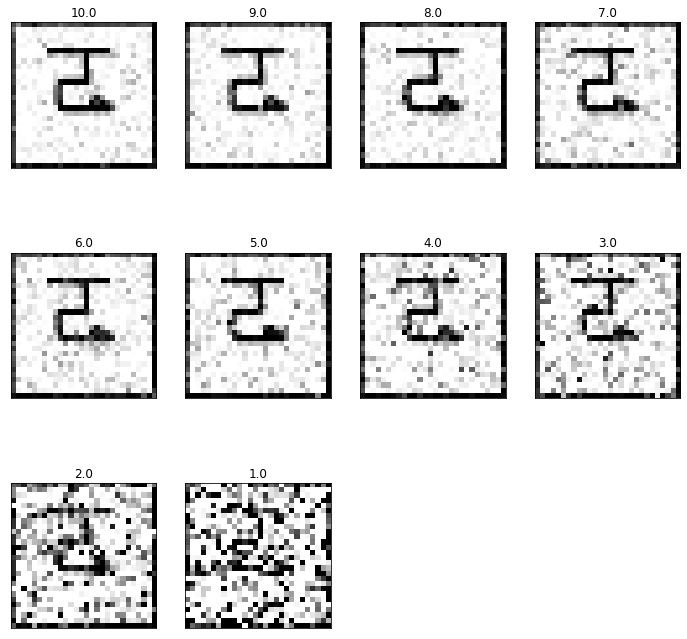

In [18]:
vary_eps(characters, target_h, target_w, m, 10, 1, -1)